In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# # import the results


# # Folder where the individual results are stored
# results_folder = "simulation_results"

# # List to hold all the DataFrames
# all_dfs = []

# # Loop through each result file
# for i in range(1, 11):
#     file_path = os.path.join(results_folder, f"simulation_results_{i}.csv")
#     df = pd.read_csv(file_path)
#     df['SIM_ID'] = i  # ✅ Add SIM_ID column
#     all_dfs.append(df)

# # Combine all DataFrames into one
# combined_df = pd.concat(all_dfs, ignore_index=True)

# # Save to a new combined CSV file
# combined_df.to_csv("data/combined_simulation_results.csv", index=False)



✅ Combined results saved to combined_simulation_results.csv with SIM_ID tracking.


In [ ]:
df = pd.read_csv("data/combined_simulation_results.csv")

## 1. Weapon Win Rate at dodge frequency = 0.0

In [49]:
df.head()

,weapon,dodge_frequency,enemy_id,enemy_defense_multiplier,round,result,attacks_spent,player_hp_left,SIM_ID
0,Axe,0.0,1,Low,1,lose,9,0.0,1
1,Axe,0.0,1,Low,2,lose,9,0.0,1
2,Axe,0.0,1,Low,3,lose,9,0.0,1
3,Axe,0.0,1,Low,4,lose,9,0.0,1
4,Axe,0.0,1,Low,5,lose,9,0.0,1


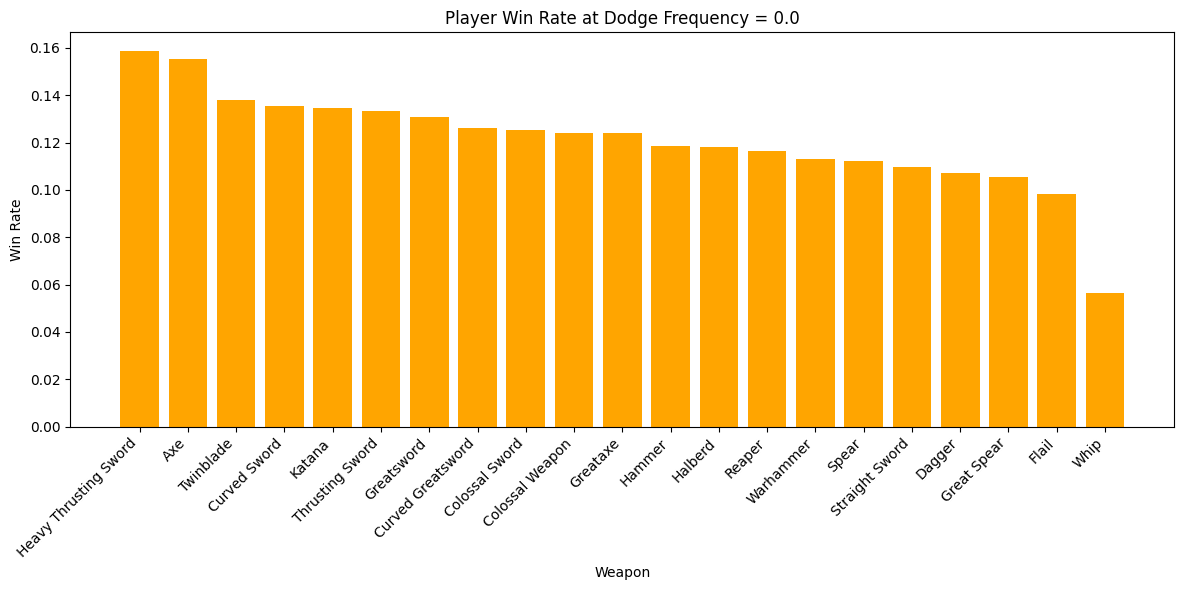

In [50]:
# Filter and calculate win rate at dodge = 0.0
weapon_win_0_dodge = (
    df[df['dodge_frequency'] == 0.0]
    .groupby("weapon")["result"]
    .apply(lambda x: (x == "win").mean())
    .reset_index(name="win_rate")
)

# Sort by win rate descending
weapon_win_0_dodge = weapon_win_0_dodge.sort_values(by="win_rate", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(weapon_win_0_dodge["weapon"], weapon_win_0_dodge["win_rate"], color='orange')
plt.xlabel("Weapon")
plt.ylabel("Win Rate")
plt.title("Player Win Rate at Dodge Frequency = 0.0")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("visualizations/weapon_win_rate_0_dodge.png")
plt.show()


ANOVA F-statistic: 424.7493051831113
ANOVA p-value: 0.0

Significant differences found! Running Tukey's HSD...
               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
                  Axe        Colossal Sword  -0.0303    0.0 -0.0355 -0.0251   True
                  Axe       Colossal Weapon  -0.0312    0.0 -0.0364  -0.026   True
                  Axe     Curved Greatsword  -0.0291    0.0 -0.0343 -0.0239   True
                  Axe          Curved Sword  -0.0199    0.0 -0.0251 -0.0147   True
                  Axe                Dagger  -0.0484    0.0 -0.0536 -0.0432   True
                  Axe                 Flail   -0.057    0.0 -0.0622 -0.0518   True
                  Axe           Great Spear  -0.0499    0.0 -0.0551 -0.0447   True
                  Axe              Greataxe  -0.0315    0.0

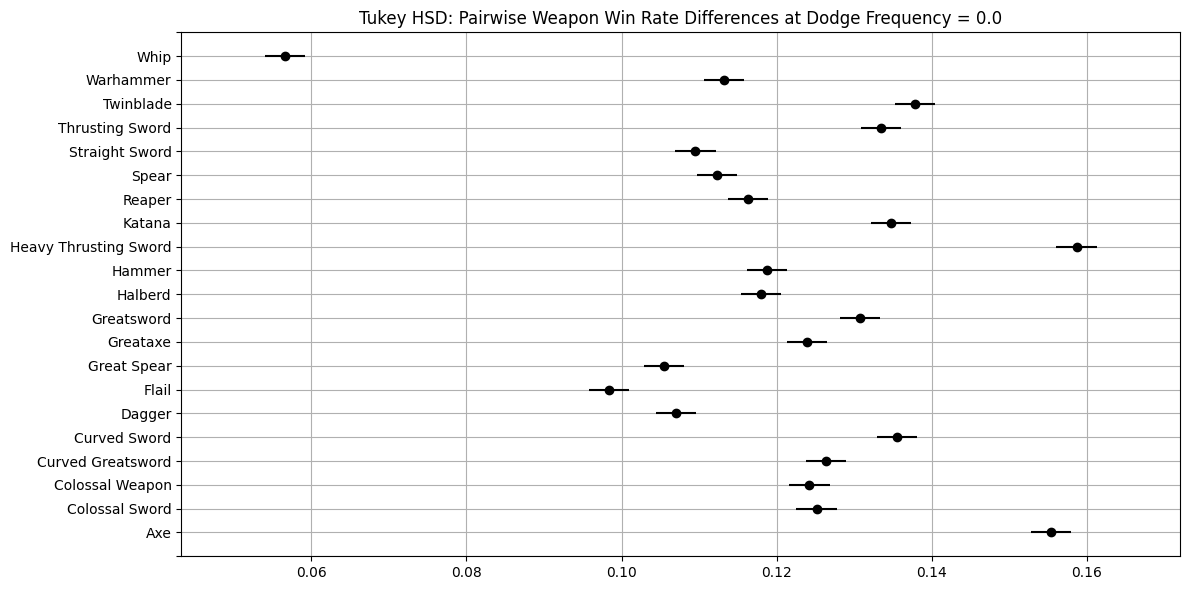

In [ ]:
# Perform ANOVA and Tukey's HSD test for win rates at dodge = 0.0
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Filter data at dodge = 0.0
df_dodge_0 = df[df['dodge_frequency'] == 0.0]

# Group data by weapon
weapon_groups = [group['result'].eq('win').astype(int).values for name, group in df_dodge_0.groupby("weapon")]

# Perform one-way ANOVA
anova_result = f_oneway(*weapon_groups)
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

# Post-hoc test only if significant
if anova_result.pvalue < 0.05:
    print("\nSignificant differences found! Running Tukey's HSD...")

    tukey = pairwise_tukeyhsd(
        endog=df_dodge_0['result'].eq('win').astype(int),  # Convert win/lose to 1/0
        groups=df_dodge_0['weapon'],
        alpha=0.05
    )

    print(tukey.summary())

    # Plot Tukey HSD results
    tukey.plot_simultaneous(figsize=(12, 6))
    plt.title("Tukey HSD: Pairwise Weapon Win Rate Differences at Dodge Frequency = 0.0")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("visualizations/tukey_weapon_winrate_diff.png")
    plt.show()
else:
    print("No significant difference in win rates between weapons.")


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD test
tukey = pairwise_tukeyhsd(
    endog=df_dodge_0['result'].eq('win').astype(int),
    groups=df_dodge_0['weapon'],
    alpha=0.05
)

# Convert to DataFrame
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

# Percentage of significantly different pairs
total_pairs = len(tukey_df)
significant_pairs = tukey_df['reject'].sum()
percent_significant = (significant_pairs / total_pairs) * 100

print(f"Total weapon pairs compared: {total_pairs}")
print(f"Significantly different pairs: {significant_pairs}")
print(f"Percentage of significantly different pairs: {percent_significant:.2f}%")

# Ranked list of weapons by number of significant differences
# Count appearances in rejected comparisons
significant_weapons = pd.concat([
    tukey_df[tukey_df['reject']]['group1'],
    tukey_df[tukey_df['reject']]['group2']
])

weapon_rank = significant_weapons.value_counts().reset_index()
weapon_rank.columns = ['weapon', 'significant_diff_count']

print("\nRanked list of weapons by # of significant differences with others:")
print(weapon_rank)


Total weapon pairs compared: 210
Significantly different pairs: 181
Percentage of significantly different pairs: 86.19%

Ranked list of weapons by # of significant differences with others:
                   weapon  significant_diff_count
0                   Flail                      20
1                    Whip                      20
2   Heavy Thrusting Sword                      19
3                     Axe                      19
4             Great Spear                      18
5                  Hammer                      18
6                  Dagger                      18
7         Colossal Weapon                      17
8          Colossal Sword                      17
9               Twinblade                      17
10                  Spear                      17
11                Halberd                      17
12               Greataxe                      17
13           Curved Sword                      16
14      Curved Greatsword                      16
15         

## 2. Heatmap: win rate by weapon + dodge_frequency

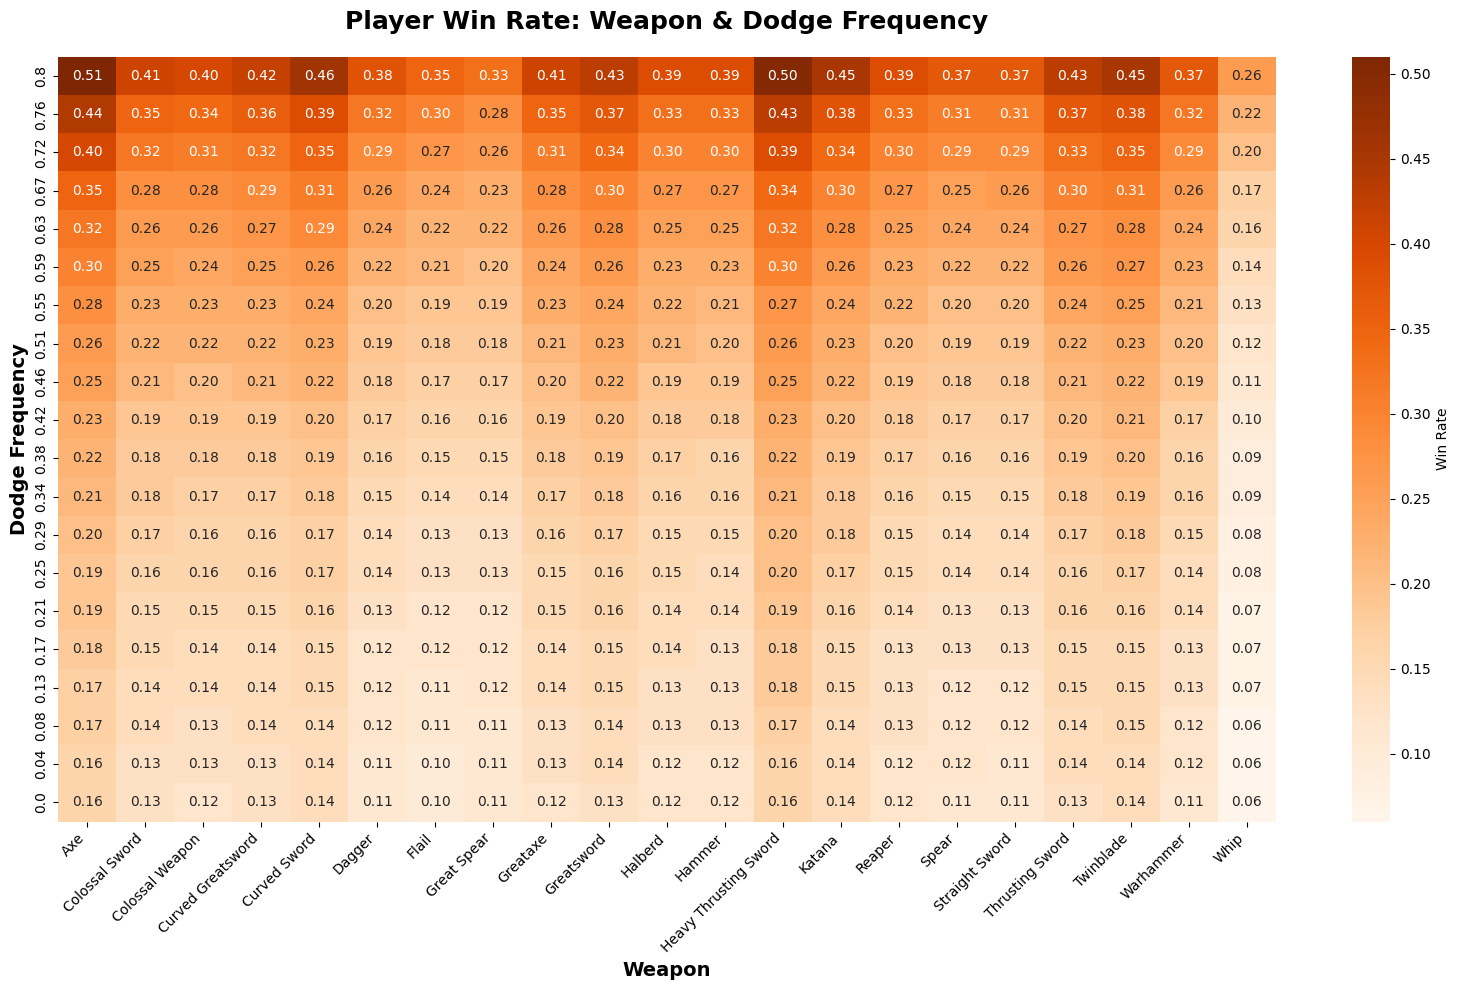

In [53]:
# Define 20 evenly spaced dodge frequency bins from 0 to 0.8
dodge_bins = np.linspace(0, 0.8, 20)
df['dodge_frequency_rounded'] = df['dodge_frequency'].apply(
    lambda x: min(dodge_bins, key=lambda b: abs(b - x))
)

# Round dodge frequencies to 2 decimal places for labeling
df['dodge_frequency_rounded'] = df['dodge_frequency_rounded'].round(2)

# Compute win rate by weapon and dodge_frequency
heatmap_data = (
    df.groupby(["weapon", "dodge_frequency_rounded"])["result"]
    .apply(lambda x: round((x == "win").mean(), 2))
    .reset_index(name="win_rate")
)

# Pivot table for heatmap
heatmap_matrix = heatmap_data.pivot(
    index="dodge_frequency_rounded",
    columns="weapon",
    values="win_rate"
)

# Plot
plt.figure(figsize=(16, 10))
ax = sns.heatmap(
    heatmap_matrix,
    annot=True,
    fmt=".2f",
    cmap="Oranges",
    cbar_kws={"label": "Win Rate"}
)


plt.title("Player Win Rate: Weapon & Dodge Frequency", fontsize=18, weight='bold', pad=20)
plt.xlabel("Weapon", fontsize=14, weight='bold')
plt.ylabel("Dodge Frequency", fontsize=14, weight='bold')

# Rotate x-axis labels and enlarge ticks
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10,)

# Flip y-axis to start from 0.0 at the bottom
ax.invert_yaxis()

plt.tight_layout()
plt.savefig("visualizations/weapon_dodge_heatmap.png")
plt.show()


Weapon Sensitivity to Dodge (Slope of Win Rate vs Dodge Frequency):
                   weapon  dodge_slope
0                     Axe     0.352675
12  Heavy Thrusting Sword     0.336297
4            Curved Sword     0.319986
18              Twinblade     0.313058
13                 Katana     0.309823
9              Greatsword     0.305232
17        Thrusting Sword     0.298867
3       Curved Greatsword     0.294564
1          Colossal Sword     0.283838
8                Greataxe     0.283487
2         Colossal Weapon     0.280680
14                 Reaper     0.276230
5                  Dagger     0.273608
10                Halberd     0.272181
11                 Hammer     0.270534
19              Warhammer     0.266603
16         Straight Sword     0.262611
15                  Spear     0.259179
6                   Flail     0.251428
7             Great Spear     0.232466
20                   Whip     0.211060


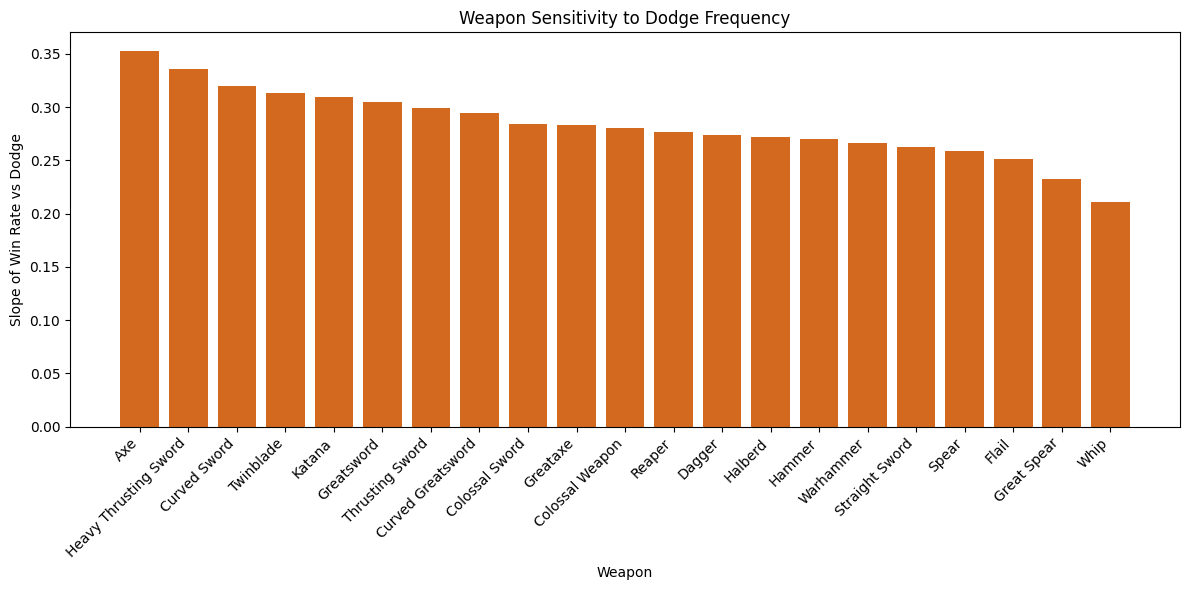

In [ ]:
# Compute slopes for each weapon

from sklearn.linear_model import LinearRegression

# Group data by weapon and dodge frequency (already rounded to 2 digits)
weapon_dodge_winrate = (
    df.groupby(['weapon', 'dodge_frequency'])['result']
    .apply(lambda x: (x == 'win').mean())
    .reset_index(name='win_rate')
)

slopes = []

for weapon, group in weapon_dodge_winrate.groupby("weapon"):
    X = group['dodge_frequency'].values.reshape(-1, 1)
    y = group['win_rate'].values

    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]
    slopes.append((weapon, slope))

# Convert to DataFrame and sort
slope_df = pd.DataFrame(slopes, columns=["weapon", "dodge_slope"]).sort_values(by="dodge_slope", ascending=False)

print("Weapon Sensitivity to Dodge (Slope of Win Rate vs Dodge Frequency):")
print(slope_df)

# plot slopes
plt.figure(figsize=(12, 6))
plt.bar(slope_df["weapon"], slope_df["dodge_slope"], color='chocolate')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Weapon")
plt.ylabel("Slope of Win Rate vs Dodge")
plt.title("Weapon Sensitivity to Dodge Frequency")
plt.tight_layout()
plt.savefig("visualizations/weapon_dodge_sensitivity.png")
plt.show()


## 3. Win rate of each weapon & dodge frequency against each defense_multiplier

In [ ]:

# Ensure the output folder exists
# os.makedirs("visualizations/heatmaps_by_defense", exist_ok=True)

# Define 20 evenly spaced dodge frequency bins from 0 to 0.8
dodge_bins = np.linspace(0, 0.8, 20)
df['dodge_frequency_rounded'] = df['dodge_frequency'].apply(lambda x: min(dodge_bins, key=lambda b: abs(b - x)))
df['dodge_frequency_rounded'] = df['dodge_frequency_rounded'].round(2)

# Mapping from defense multiplier label to true enemy defense level
defense_description_map = {
    "Very Low": "Very High Enemy Defense",
    "Low": "High Enemy Defense",
    "Median": "Moderate Enemy Defense",
    "High": "Low Enemy Defense",
    "Very High": "Very Low Enemy Defense"
}

# Loop over each defense tier and create a heatmap
for tier in sorted(df['enemy_defense_multiplier'].unique()):
    # Filter data for current tier
    subset = df[df['enemy_defense_multiplier'] == tier]

    # Group by weapon and dodge, compute win rate
    heatmap_data = (
        subset.groupby(['weapon', 'dodge_frequency_rounded'])['result']
        .apply(lambda x: round((x == 'win').mean(), 2))
        .reset_index(name='win_rate')
    )

    # Pivot to wide format for heatmap
    heatmap_matrix = heatmap_data.pivot(
        index="dodge_frequency_rounded",
        columns="weapon",
        values="win_rate"
    )

    # Plot heatmap
    plt.figure(figsize=(16, 10))
    ax = sns.heatmap(
        heatmap_matrix,
        annot=True,
        fmt=".2f",
        cmap="YlOrBr",
        cbar_kws={"label": "Win Rate"}
    )

    # Title reflects actual enemy defense level
    true_defense_label = defense_description_map.get(tier, tier)
    plt.title(f"Player Win Rate vs {true_defense_label}", fontsize=18, weight='bold', pad=20)

    # Axis styling
    plt.xlabel("Weapon", fontsize=14, weight='bold')
    plt.ylabel("Dodge Frequency", fontsize=14, weight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    ax.invert_yaxis()
    plt.tight_layout()

    # Save figure
    safe_label = tier.replace(" ", "_")
    plt.savefig(f"visualizations/heatmaps_by_defense/heatmap_winrate_{safe_label}.png")
    plt.close()

print("Heatmaps saved by enemy defense tier.")


✅ Heatmaps saved by enemy defense tier.
